# **IMPORTING NECESSARY LIBRARIES**

In [0]:
from keras.layers import Input, Lambda, Dense, Flatten, Dropout
from keras.models import Model
from keras.applications import Xception
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os

# **LOADING AND UNZIPPING THE DATASET**

In [0]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1ReLMPYgrLXAPhAlo2pd4atv2TZa0fvjM' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1ReLMPYgrLXAPhAlo2pd4atv2TZa0fvjM" -O data.zip && rm -rf /tmp/cookies.txt

--2020-05-16 16:34:39--  https://docs.google.com/uc?export=download&confirm=Jz_B&id=1ReLMPYgrLXAPhAlo2pd4atv2TZa0fvjM
Resolving docs.google.com (docs.google.com)... 64.233.187.100, 64.233.187.139, 64.233.187.138, ...
Connecting to docs.google.com (docs.google.com)|64.233.187.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-94-docs.googleusercontent.com/docs/securesc/s8pm6fmufpn75aitg31118or6rqqva80/mrnjb2bukcvvrlej1smfntdsb9stbdr1/1589646825000/14211000813324722452/16014517192289444385Z/1ReLMPYgrLXAPhAlo2pd4atv2TZa0fvjM?e=download [following]
--2020-05-16 16:34:39--  https://doc-0c-94-docs.googleusercontent.com/docs/securesc/s8pm6fmufpn75aitg31118or6rqqva80/mrnjb2bukcvvrlej1smfntdsb9stbdr1/1589646825000/14211000813324722452/16014517192289444385Z/1ReLMPYgrLXAPhAlo2pd4atv2TZa0fvjM?e=download
Resolving doc-0c-94-docs.googleusercontent.com (doc-0c-94-docs.googleusercontent.com)... 74.125.204.132, 2404:6800:4008:c04::84
Connecting

In [0]:
!unzip '/content/data.zip'

Streaming output truncated to the last 5000 lines.
  inflating: split_dataset/train/bottles/img (665).jpg  
  inflating: split_dataset/train/bottles/img (666).jpg  
  inflating: split_dataset/train/bottles/img (667).jpg  
  inflating: split_dataset/train/bottles/img (668).jpg  
  inflating: split_dataset/train/bottles/img (669).jpg  
  inflating: split_dataset/train/bottles/img (67).jpg  
  inflating: split_dataset/train/bottles/img (670).jpg  
  inflating: split_dataset/train/bottles/img (671).jpg  
  inflating: split_dataset/train/bottles/img (672).jpg  
  inflating: split_dataset/train/bottles/img (673).jpg  
  inflating: split_dataset/train/bottles/img (674).jpg  
  inflating: split_dataset/train/bottles/img (675).jpg  
  inflating: split_dataset/train/bottles/img (676).jpg  
  inflating: split_dataset/train/bottles/img (677).jpg  
  inflating: split_dataset/train/bottles/img (678).jpg  
  inflating: split_dataset/train/bottles/img (679).jpg  
  inflating: split_dataset/train/bottl

# **SPECIFIYING PATHS TO DIRECTORY**

In [0]:
from glob import glob
base_path = '/content/split_dataset'
folders = glob('/content/split_dataset/train/*')
print(folders)

['/content/split_dataset/train/automatic_rifles', '/content/split_dataset/train/boots', '/content/split_dataset/train/pistol_revolver', '/content/split_dataset/train/band-aid', '/content/split_dataset/train/syringes', '/content/split_dataset/train/knives', '/content/split_dataset/train/bottles', '/content/split_dataset/train/bullet_shells']


In [0]:
IMAGE_SIZE = [299, 299]

train_path = '/content/split_dataset/train'
valid_path = '/content/split_dataset/validation'

# **PREPARING THE PRE-TRAINED Xception**

In [0]:
xception = Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in xception.layers:
  layer.trainable = False

83689472/83683744 [==============================] - 7s 0us/step


In [0]:
x = Flatten()(xception.output)
prediction = Dense(len(folders), activation='softmax')(x)

# **CREATING THE Xception MODEL**

In [0]:
model_xception = Model(inputs=xception.input, outputs=prediction)
model_xception.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [0]:
model_xception.compile(
  loss='categorical_crossentropy',
  optimizer= 'adam',
  metrics=['accuracy']
)

# **USING IMAGE AUGMENTATION**

In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    rescale = 1./255,
    fill_mode = 'nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/split_dataset/train',
                                                 target_size = (299, 299),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

validation_set = validation_datagen.flow_from_directory('/content/split_dataset/validation',
                                            target_size = (299, 299),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 6481 images belonging to 8 classes.
Found 1625 images belonging to 8 classes.


In [0]:
history_xception = model_xception.fit_generator(
  training_set,
  validation_data=validation_set,
  epochs=50,
  verbose = 1,
  steps_per_epoch=len(training_set),
  validation_steps=len(validation_set)
)

Epoch 1/50
 28/203 [===>..........................] - ETA: 3:23 - loss: 5.2261 - accuracy: 0.6822

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


203/203 [==============================] - 260s 1s/step - loss: 2.3794 - accuracy: 0.8648 - val_loss: 0.0479 - val_accuracy: 0.9305
Epoch 2/50
203/203 [==============================] - 246s 1s/step - loss: 1.7515 - accuracy: 0.9208 - val_loss: 1.9027 - val_accuracy: 0.9311
Epoch 3/50
203/203 [==============================] - 244s 1s/step - loss: 2.0555 - accuracy: 0.9264 - val_loss: 4.4089 - val_accuracy: 0.8665
Epoch 4/50
203/203 [==============================] - 241s 1s/step - loss: 1.9134 - accuracy: 0.9343 - val_loss: 2.1233 - val_accuracy: 0.9280
Epoch 5/50
203/203 [==============================] - 239s 1s/step - loss: 1.9393 - accuracy: 0.9414 - val_loss: 2.0412 - val_accuracy: 0.8929
Epoch 6/50
203/203 [==============================] - 235s 1s/step - loss: 1.7729 - accuracy: 0.9434 - val_loss: 1.7562 - val_accuracy: 0.9157
Epoch 7/50
203/203 [==============================] - 236s 1s/step - loss: 1.8030 - accuracy: 0.9472 - val_loss: 0.5144 - val_accuracy: 0.9182
Epoch 8/50

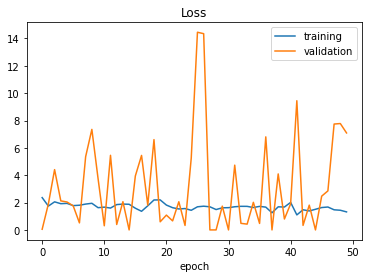

In [0]:
plt.plot(history_xception.history['loss'])
plt.plot(history_xception.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'])

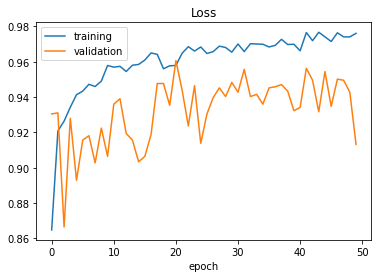

In [0]:
plt.plot(history_xception.history['accuracy'])
plt.plot(history_xception.history['val_accuracy'])
plt.title('Loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'])

In [0]:
model_xception.save('xception.h5')
from google.colab import files
files.download('xception.h5')

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 49286, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 320, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 351, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 364, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 724, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil